# CS275P Final Project: Intrusion Detection System Analysis and Prediction

#### Connor McManigal, Aaron Mui, Rishabh Verma, and Peyton Politewicz

## Imports and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('RT_IOT2022.csv')
x = df.drop(['Attack_type'], axis = 1)
y = df[['Attack_type']]

print("Data Shape with Aggregates\n")
print("Rows:", x.shape[0])
print("Features:", x.shape[1])

Data Shape with Aggregates

Rows: 209959
Features: 83


In [5]:
X = x.filter(regex='^((?!max|min|avg|std).)*$')

print("Data Shape without Aggregates\n")
print("Rows:", X.shape[0])
print("Features:", X.shape[1])
X.head()

Data Shape without Aggregates

Rows: 209959
Features: 47


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.tot,idle.tot,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,31004,53,udp,dns,0.005875,1,1,1,1,170.209561,...,0.0,0.0,0.0,0.000000,0.000000,5.875111e+03,0.0,0,0,0
1,54222,443,tcp,-,7.807541,159,144,134,38,20.364926,...,15569.5,62.5,15.5,10096.717546,33346.967364,7.807541e+06,0.0,11890,3216,11890
2,48618,80,tcp,http,0.216894,7,7,1,2,32.273807,...,0.0,0.0,0.0,0.000000,0.000000,3.060679e+05,0.0,29200,29200,1065
3,8,0,icmp,-,0.014496,10,10,10,10,689.841286,...,0.0,0.0,0.0,0.000000,0.000000,1.449609e+04,0.0,0,0,0
4,54222,443,tcp,-,8.797776,158,176,133,45,17.959084,...,15570.5,124.0,19.0,10251.481385,32467.560574,8.797776e+06,0.0,11890,3220,11890


## Exploratory Data Analysis

In [6]:
# get counts of targets
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Alexa                         86842
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_92070/961355872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = y, x = y['Attack_type'], order = y['Attack_type'].value_counts().index, palette = 'CMRmap')


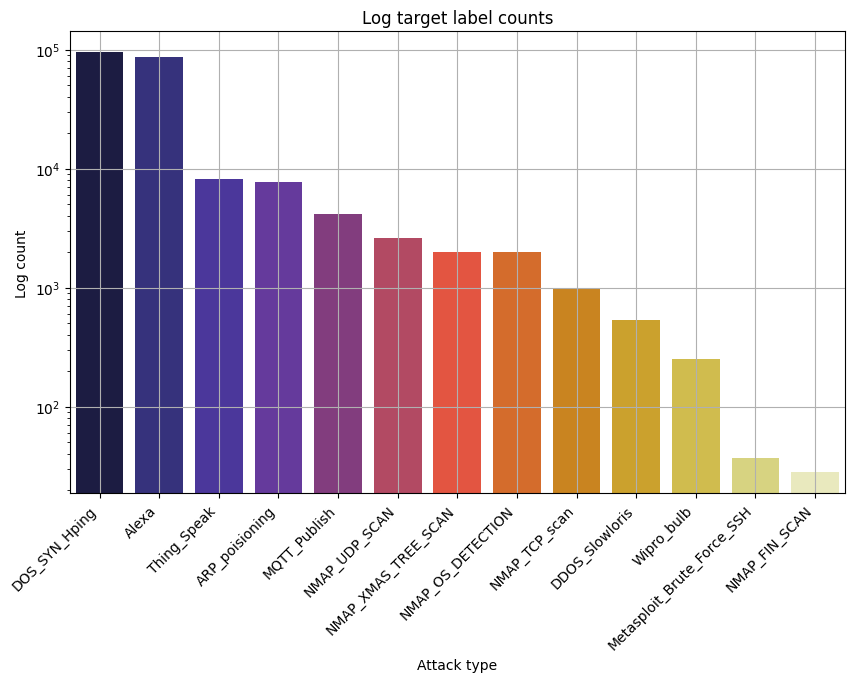

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(data = y, x = y['Attack_type'], order = y['Attack_type'].value_counts().index, palette = 'CMRmap')
plt.yscale('log')
plt.ylabel('Log count')
plt.xlabel('Attack type')
plt.title('Log target label counts')
plt.xticks(rotation = 45, ha = 'right')
plt.grid()
plt.show()

In [8]:
# get counts of protocols
X['proto'].value_counts()

proto
tcp     190243
udp      17655
icmp      2061
Name: count, dtype: int64

In [9]:
# get counts of network services
X['service'].value_counts()

service
-         164484
ssl        20935
dns        14670
http        5471
mqtt        4132
ntp          128
dhcp          66
irc           43
ssh           28
radius         2
Name: count, dtype: int64

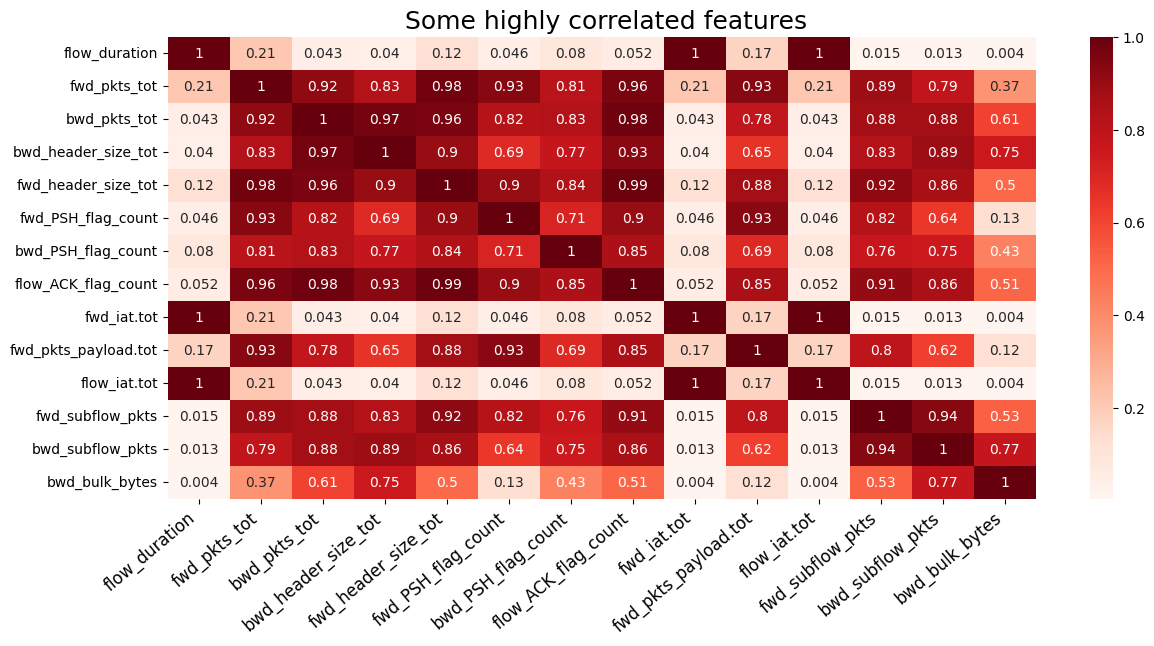

In [10]:
X_filter = X[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'bwd_header_size_tot', 'fwd_header_size_tot', 'fwd_PSH_flag_count', 
                'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_iat.tot', 'fwd_pkts_payload.tot', 'flow_iat.tot', 'fwd_subflow_pkts', 
                'bwd_subflow_pkts', 'bwd_bulk_bytes']]
X_corr = X_filter.corr()

plt.figure(figsize=(14,6))
sns.heatmap(X_corr, annot = True, cmap = 'Reds')
plt.title(' Some highly correlated features', fontsize = 18)
plt.xticks(rotation = 40, ha = 'right', fontsize = 12)
plt.show()

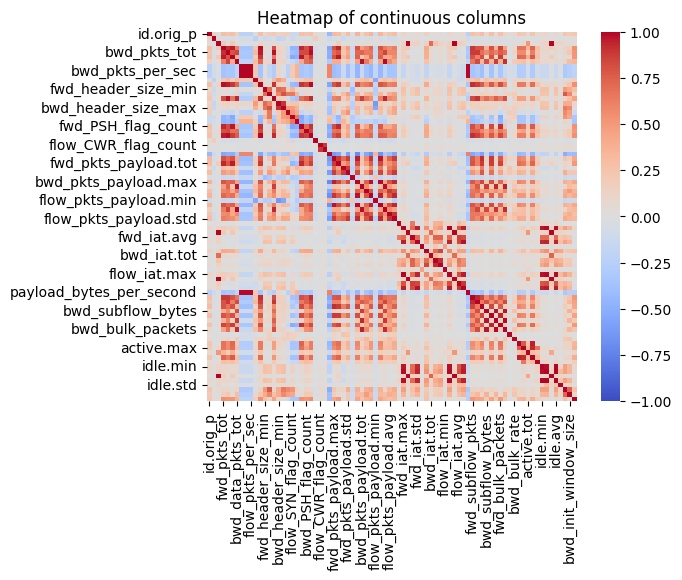

In [11]:
full_corr_matrix = x.drop(["proto", "service", "bwd_URG_flag_count"], axis=1).corr()
sns.heatmap(full_corr_matrix, cmap='coolwarm', cbar=True, vmin=-1, vmax=1, square=True)
plt.title("Heatmap of continuous columns")
plt.show()

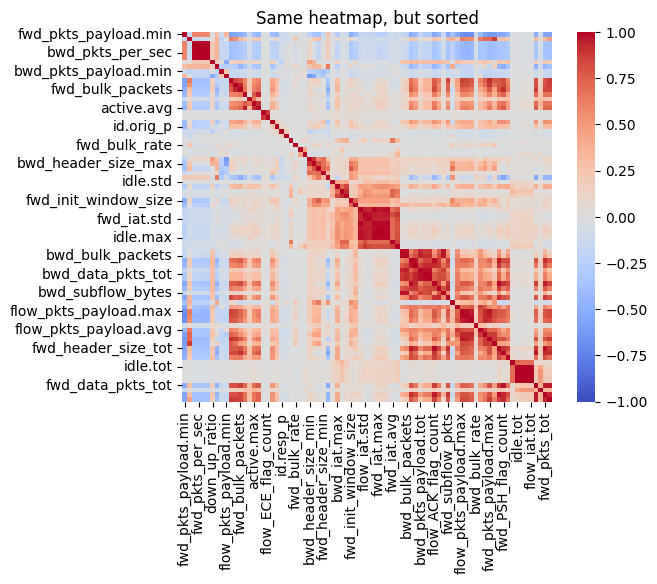

In [12]:
# Use agglomerative clustering on the heatmap
# Result is non-deterministic, so I saved a good value

#from scipy.cluster.hierarchy import linkage, leaves_list
#linkage_matrix = linkage(corr_matrix, method='complete')
#ordered_indices = leaves_list(linkage_matrix)

ordered_indices = np.array([26,29,56,7,8,9,10,19,31,36,59,61,63,67,71,68,70,24,25,79,0,1,23,41,65,46,51,15,16,13,12,18,76,47,49,50,77,78,72,55,45,75,42,52,73,44,54,62,64,4,14,33,6,38,22,58,60,57,17,34,37,32,35,66,39,40,27,30,11,20,21,48,74,43,2,53,5,69,3,28])
ordered_corr_matrix = full_corr_matrix.iloc[ordered_indices, ordered_indices]

sns.heatmap(ordered_corr_matrix, cmap='coolwarm', cbar=True, vmin=-1, vmax=1, square=True)
plt.title("Same heatmap, but sorted")
plt.show()

In [13]:
import plotly.graph_objs as go
import plotly.express as px

fig = px.imshow(np.round(np.abs(ordered_corr_matrix), 2),
                text_auto = True,
                labels = dict(color="Abs(Correlation)"),
                x = ordered_corr_matrix.columns,
                y = corr_matrix.columns,
                color_continuous_scale = "viridis",
                title="Interactive sorted heatmap")

fig.update_traces(hovertemplate="<b>%{x}</b> vs <b>%{y}</b><br>Abs(correlation): %{z:.2f}<extra></extra>")
fig.show()

NameError: name 'corr_matrix' is not defined

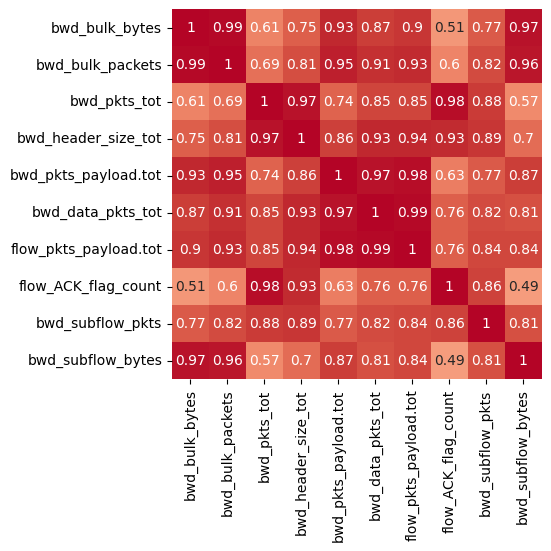

In [14]:
cols = range(47,57)
sub_corr_matrix = ordered_corr_matrix.iloc[cols, cols]
sns.heatmap(sub_corr_matrix, cmap='coolwarm', cbar=False, vmin=-1, vmax=1, annot=True, square=True)
plt.show()

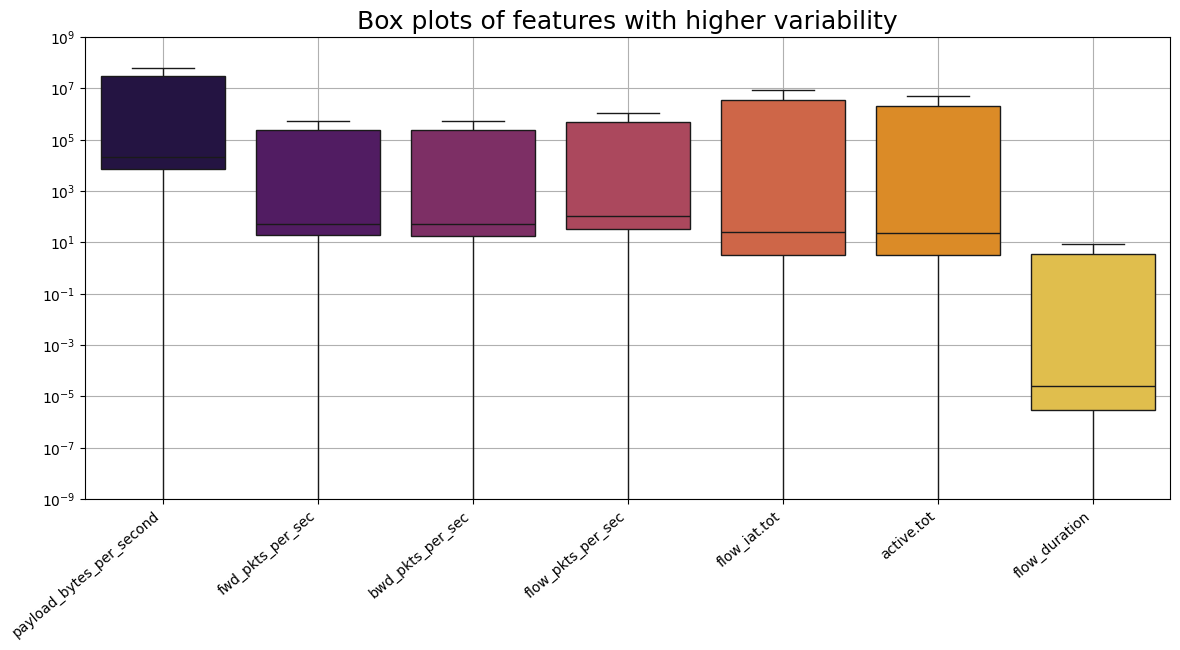

In [15]:
# visualize box plots of features with higher variability
X_higher_variability = X[['payload_bytes_per_second', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'flow_iat.tot', 'active.tot', 'flow_duration']]

plt.figure(figsize = (14,6))
sns.boxplot(data = X_higher_variability, showfliers = False, palette = 'inferno')
plt.yscale('log')
plt.ylim(10**-9, 10**9)
plt.xticks(rotation = 40, ha = 'right')
plt.title('Box plots of features with higher variability', fontsize  = 18)
plt.grid()
plt.show()

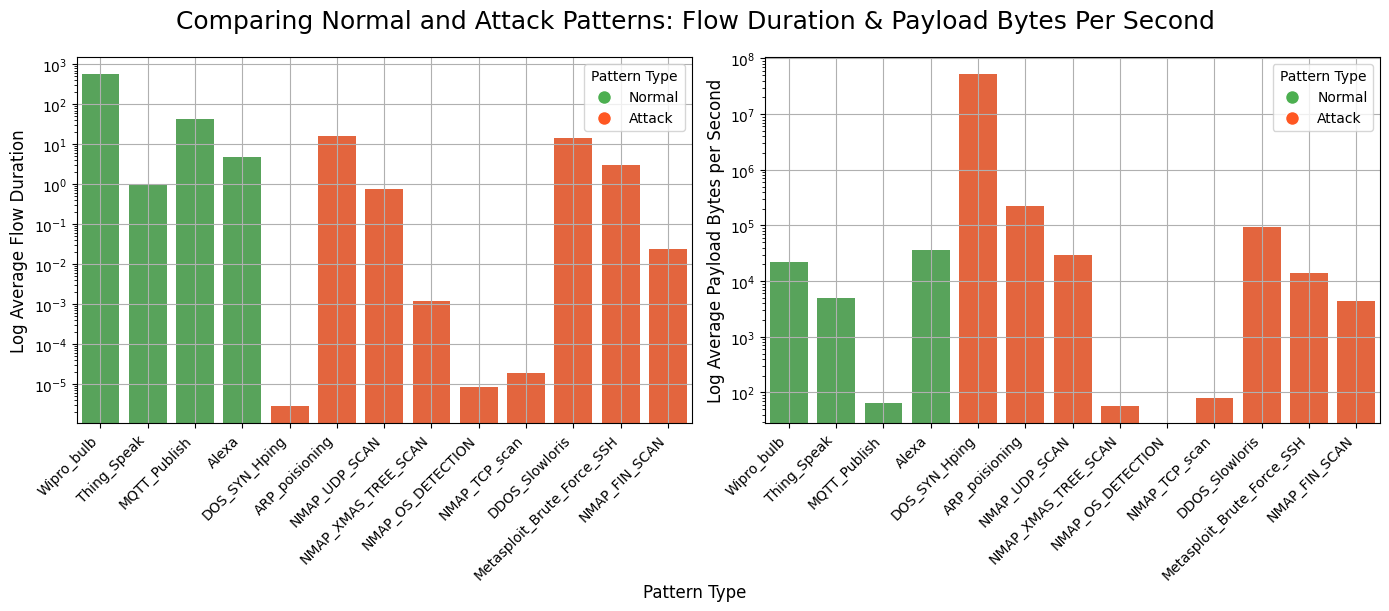

In [18]:
# average flow duration and payload bytes per second for normal patterns
full_data = pd.concat([X,y], axis = 1)

normal_types = [
    'Wipro_bulb',
    'Thing_Speak',
    'MQTT_Publish',
    'Alexa'
]

attack_types = [
    'DOS_SYN_Hping',
    'ARP_poisioning',
    'NMAP_UDP_SCAN',
    'NMAP_XMAS_TREE_SCAN',
    'NMAP_OS_DETECTION',
    'NMAP_TCP_scan',
    'DDOS_Slowloris',
    'Metasploit_Brute_Force_SSH',
    'NMAP_FIN_SCAN'
]
types = normal_types + attack_types

fig, axes = plt.subplots(1,2, figsize = (14,6))

for normal in normal_types:
    normal_patterns = full_data[full_data['Attack_type'] == normal]
    avg_flow_duration = normal_patterns['flow_duration'].mean()
    sns.barplot(x = [normal], y = [avg_flow_duration], ax = axes[0], color = '#4CAF50')

for attack in attack_types:
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_flow_duration = attack_patterns['flow_duration'].mean()
    sns.barplot(x = [attack], y = [avg_flow_duration], ax = axes[0], color = '#FF5722')

legend_labels = ['Normal', 'Attack']
colors = ['#4CAF50', '#FF5722']
legend_handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = label, markerfacecolor = color, markersize = 10) for label, color in zip(legend_labels, colors)]

#axes[0].set_title('Log Average Flow Duration', fontsize = 13)
axes[0].set_ylabel('Log Average Flow Duration', fontsize = 12)
axes[0].set_yscale('log')
axes[0].grid()
axes[0].set_xticks(range(len(types)))
axes[0].set_xticklabels(types, rotation = 45, ha = 'right')
axes[0].legend(title = 'Pattern Type', handles = legend_handles, loc = 'upper right')


for normal in normal_types:
    normal_patterns = full_data[full_data['Attack_type'] == normal]
    avg_payload = normal_patterns['payload_bytes_per_second'].mean()
    sns.barplot(x = [normal], y = [avg_payload], ax = axes[1], color = '#4CAF50')

for attack in attack_types:
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_payload = attack_patterns['payload_bytes_per_second'].mean()
    sns.barplot(x = [attack], y = [avg_payload], ax = axes[1], color = '#FF5722')

#axes[1].set_title('Log Average Payload Bytes per Second', fontsize = 13)
axes[1].set_ylabel('Log Average Payload Bytes per Second', fontsize = '12')
axes[1].set_yscale('log')
axes[1].grid()
axes[1].set_xticks(range(len(types)))
axes[1].set_xticklabels(types, rotation = 45, ha = 'right')
axes[1].legend(title = 'Pattern Type', handles = legend_handles, loc = 'upper right')

plt.suptitle('Comparing Normal and Attack Patterns: Flow Duration & Payload Bytes Per Second', fontsize = 18)

fig.text(0.5, 0.0001, 'Pattern Type', ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

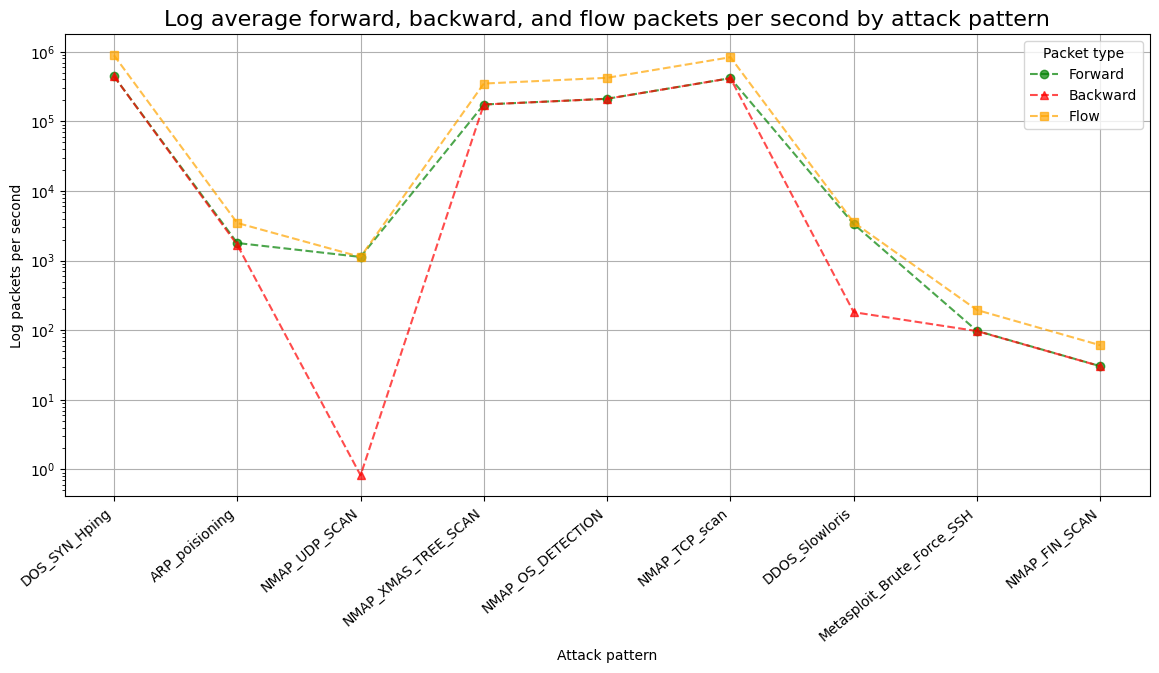

In [17]:
# forward, backward, and flow packets per second by Attack Pattern
fwd = []
bwd = []
flow = []

plt.figure(figsize = (14, 6))

for attack in attack_types:
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_fwd_pkts = attack_patterns['fwd_pkts_per_sec'].mean()
    fwd.append(avg_fwd_pkts)
    avg_bwd_pkts = attack_patterns['bwd_pkts_per_sec'].mean()
    bwd.append(avg_bwd_pkts)
    avg_flow_pkts = attack_patterns['flow_pkts_per_sec'].mean()
    flow.append(avg_flow_pkts)

plt.plot(attack_types, fwd, label = 'Forward',  linestyle = '--', marker = 'o', color = 'green', alpha = 0.7)
plt.plot(attack_types, bwd, label = 'Backward', linestyle = '--', marker = '^', color = 'red', alpha = 0.7)
plt.plot(attack_types, flow, label = 'Flow',  linestyle = '--', marker = 's', color = 'orange', alpha = 0.7)
plt.title('Log average forward, backward, and flow packets per second by attack pattern', fontsize = 16)
plt.xlabel('Attack pattern')
plt.ylabel('Log packets per second')
plt.xticks(rotation = 40, ha = 'right')
plt.legend(title = "Packet type")
plt.grid()
plt.yscale('log')
plt.show()

## Unsupervised VAE 

## Supervised VAE

## Comparing Predictions: Benign vs. Malicious

- Exclude id.orig_p, id_resp_p, ANY OTHERS?
- One-hot encode proto and service ?